In [1]:
import pandas as pd 
import numpy as np

import os
import sys

import librosa
import librosa.display 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

import keras 
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D,MaxPooling1D,Flatten,Dropout,BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

import warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)


In [6]:
# ravdess data seti 
ravdess = "C:/Users/emreh/Desktop/DATA/RAVDESS"

In [7]:
ravdess_directory_list = os.listdir(ravdess)

In [8]:
len(ravdess_directory_list)

24

In [9]:
file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    
    actor = os.listdir(ravdess +"/"+ dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        
        file_emotion.append(int(part[2]))
        file_path.append(ravdess+"/" + dir + '/' + file)

In [10]:
file_emotion

[1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,


In [11]:
emotion_df= pd.DataFrame(file_emotion,columns=["Emotions"])

In [12]:
emotion_df.head()

Emotions
0         1
1         1
2         1
3         1
4         2

In [13]:
path_df = pd.DataFrame(file_path, columns=['Path'])

In [14]:
path_df.head()

Path
0  C:/Users/emreh/Desktop/DATA/RAVDESS/Actor_01/0...
1  C:/Users/emreh/Desktop/DATA/RAVDESS/Actor_01/0...
2  C:/Users/emreh/Desktop/DATA/RAVDESS/Actor_01/0...
3  C:/Users/emreh/Desktop/DATA/RAVDESS/Actor_01/0...
4  C:/Users/emreh/Desktop/DATA/RAVDESS/Actor_01/0...

In [15]:
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

In [16]:
Ravdess_df.head()

Emotions                                               Path
0         1  C:/Users/emreh/Desktop/DATA/RAVDESS/Actor_01/0...
1         1  C:/Users/emreh/Desktop/DATA/RAVDESS/Actor_01/0...
2         1  C:/Users/emreh/Desktop/DATA/RAVDESS/Actor_01/0...
3         1  C:/Users/emreh/Desktop/DATA/RAVDESS/Actor_01/0...
4         2  C:/Users/emreh/Desktop/DATA/RAVDESS/Actor_01/0...

In [17]:
Ravdess_df.Emotions.replace({1:"neutral",2:"calm",3:"happy",4:"sad",5:"angry",6:"fear",7:"disgust",
                            8:"surprise"},inplace=True)

In [18]:
Ravdess_df.head()

Emotions                                               Path
0  neutral  C:/Users/emreh/Desktop/DATA/RAVDESS/Actor_01/0...
1  neutral  C:/Users/emreh/Desktop/DATA/RAVDESS/Actor_01/0...
2  neutral  C:/Users/emreh/Desktop/DATA/RAVDESS/Actor_01/0...
3  neutral  C:/Users/emreh/Desktop/DATA/RAVDESS/Actor_01/0...
4     calm  C:/Users/emreh/Desktop/DATA/RAVDESS/Actor_01/0...

In [19]:
# Crema data seti

In [20]:
crema = "C:/Users/emreh/Desktop/DATA/CREMA - D/AudioWAV"

In [21]:
crema_dir = os.listdir(crema)

In [22]:
emotion_file = []
path_file  =[]
for file in crema_dir:
    path_file.append(crema+"/"+file)
    
    part= file.split("_")
    if part[2] == "SAD":
        emotion_file.append('sad')
    elif part[2] == "ANG":
        emotion_file.append('angry')
    elif part[2] == 'DIS':
        emotion_file.append('disgust')
    elif part[2] == 'FEA':
        emotion_file.append('fear')
    elif part[2] == 'HAP':
        emotion_file.append('happy')
    elif part[2] == 'NEU':
        emotion_file.append('neutral')
    else:
        emotion_file.append('Unknown')


In [23]:
emotion_df = pd.DataFrame(emotion_file,columns=["Emotions"])

In [24]:
path_df = pd.DataFrame(path_file,columns=["Path"])

In [25]:
Crema_df= pd.concat([emotion_df,path_df],axis=1)

In [26]:
Crema_df.head()

Emotions                                               Path
0    angry  C:/Users/emreh/Desktop/DATA/CREMA - D/AudioWAV...
1  disgust  C:/Users/emreh/Desktop/DATA/CREMA - D/AudioWAV...
2     fear  C:/Users/emreh/Desktop/DATA/CREMA - D/AudioWAV...
3    happy  C:/Users/emreh/Desktop/DATA/CREMA - D/AudioWAV...
4  neutral  C:/Users/emreh/Desktop/DATA/CREMA - D/AudioWAV...

In [27]:
#TESS data seti 

In [28]:
tess = "C:/Users/emreh/Desktop/DATA/TESS"

In [29]:
tess_dir = os.listdir(tess)

In [30]:
emotion_file = []
path_file = []

for dir in tess_dir:
    file = os.listdir(tess +"/"+ dir)
    
    for emo in file:
        part = emo.split('.')[0]
        part = part.split('_')
        
        if part[2]=="ps":
            emotion_file.append("surprise")
        else:
            emotion_file.append(part[2])
        path_file.append(tess+"/" + dir + '/' + emo)
        
        

In [31]:
emotion_df = pd.DataFrame(emotion_file,columns=["Emotions"])

In [32]:
emotion_df.head()

Emotions
0    angry
1    angry
2    angry
3    angry
4    angry

In [33]:
path_df = pd.DataFrame(path_file,columns=["Path"])

In [34]:
path_df.head()

Path
0  C:/Users/emreh/Desktop/DATA/TESS/OAF_angry/OAF...
1  C:/Users/emreh/Desktop/DATA/TESS/OAF_angry/OAF...
2  C:/Users/emreh/Desktop/DATA/TESS/OAF_angry/OAF...
3  C:/Users/emreh/Desktop/DATA/TESS/OAF_angry/OAF...
4  C:/Users/emreh/Desktop/DATA/TESS/OAF_angry/OAF...

In [35]:
tess_df = pd.concat([emotion_df,path_df],axis=1)

In [36]:
tess_df.head()

Emotions                                               Path
0    angry  C:/Users/emreh/Desktop/DATA/TESS/OAF_angry/OAF...
1    angry  C:/Users/emreh/Desktop/DATA/TESS/OAF_angry/OAF...
2    angry  C:/Users/emreh/Desktop/DATA/TESS/OAF_angry/OAF...
3    angry  C:/Users/emreh/Desktop/DATA/TESS/OAF_angry/OAF...
4    angry  C:/Users/emreh/Desktop/DATA/TESS/OAF_angry/OAF...

In [37]:
#Savee data seti 

In [38]:
savee = "C:/Users/emreh/Desktop/DATA/savee"

In [39]:
savee_dir = os.listdir(savee)

In [40]:
emotion_file = []
path_file = []
for file in savee_dir:
    path_file.append(savee+"/"+file)
    
    part = file.split("_")[1]
    part = part[:-6]
    if part=='a':
        emotion_file.append('angry')
    elif part=='d':
        emotion_file.append('disgust')
    elif part=='f':
        emotion_file.append('fear')
    elif part=='h':
        emotion_file.append('happy')
    elif part=='n':
        emotion_file.append('neutral')
    elif part=='sa':
        emotion_file.append('sad')
    else:
        emotion_file.append('surprise')
    

In [41]:
emotion_df = pd.DataFrame(emotion_file,columns = ["Emotions"])

In [42]:
emotion_df.head()

Emotions
0    angry
1    angry
2    angry
3    angry
4    angry

In [43]:
path_df = pd.DataFrame(path_file, columns =["Path"])

In [44]:
Savee_df = pd.concat([emotion_df,path_df],axis=1)

In [45]:
Savee_df.head()

Emotions                                          Path
0    angry  C:/Users/emreh/Desktop/DATA/savee/DC_a01.wav
1    angry  C:/Users/emreh/Desktop/DATA/savee/DC_a02.wav
2    angry  C:/Users/emreh/Desktop/DATA/savee/DC_a03.wav
3    angry  C:/Users/emreh/Desktop/DATA/savee/DC_a04.wav
4    angry  C:/Users/emreh/Desktop/DATA/savee/DC_a05.wav

In [46]:
Savee_df.head()
Ravdess_df.head()
tess_df.head()
Crema_df.head()


Emotions                                               Path
0    angry  C:/Users/emreh/Desktop/DATA/CREMA - D/AudioWAV...
1  disgust  C:/Users/emreh/Desktop/DATA/CREMA - D/AudioWAV...
2     fear  C:/Users/emreh/Desktop/DATA/CREMA - D/AudioWAV...
3    happy  C:/Users/emreh/Desktop/DATA/CREMA - D/AudioWAV...
4  neutral  C:/Users/emreh/Desktop/DATA/CREMA - D/AudioWAV...

In [47]:
data_path =  pd.concat([Ravdess_df,Crema_df,tess_df,Savee_df],axis=0)

In [48]:
data_path.head()

Emotions                                               Path
0  neutral  C:/Users/emreh/Desktop/DATA/RAVDESS/Actor_01/0...
1  neutral  C:/Users/emreh/Desktop/DATA/RAVDESS/Actor_01/0...
2  neutral  C:/Users/emreh/Desktop/DATA/RAVDESS/Actor_01/0...
3  neutral  C:/Users/emreh/Desktop/DATA/RAVDESS/Actor_01/0...
4     calm  C:/Users/emreh/Desktop/DATA/RAVDESS/Actor_01/0...

In [49]:
data_path.to_csv("data_path.csv",index=False)

In [50]:
data_path.head()

Emotions                                               Path
0  neutral  C:/Users/emreh/Desktop/DATA/RAVDESS/Actor_01/0...
1  neutral  C:/Users/emreh/Desktop/DATA/RAVDESS/Actor_01/0...
2  neutral  C:/Users/emreh/Desktop/DATA/RAVDESS/Actor_01/0...
3  neutral  C:/Users/emreh/Desktop/DATA/RAVDESS/Actor_01/0...
4     calm  C:/Users/emreh/Desktop/DATA/RAVDESS/Actor_01/0...

## Veri Görseleştirme

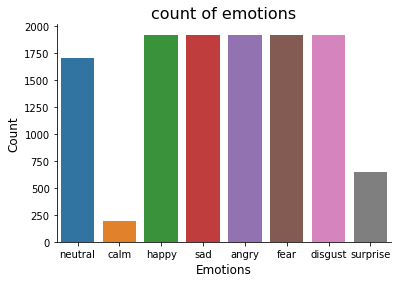

In [51]:
plt.title("count of emotions",size = 16)

sns.countplot(data_path.Emotions)
plt.ylabel("Count",size=12)
plt.xlabel("Emotions", size=12)
sns.despine(top=True, right= True, left =False, bottom=False) #keanr çizgilerini belirliyoruz
plt.show()

In [52]:
# Ses verilerini görselleştirelim

In [53]:
def create_waveplot(data,sr,e):
    plt.figure(figsize=(10,3))
    plt.title("Waveplot for audio with {} emotion".format(e), size =15)
    librosa.display.waveplot(data,sr=sr)
    plt.show()


In [54]:
def create_spectrogram(data,sr,e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12,3))
    plt.title("Spectrogram for audio {} emotions".format(e),size=15)
    librosa.display.specshow(Xdb,sr=sr,x_axis="time",y_axis="hz")
    plt.colorbar()

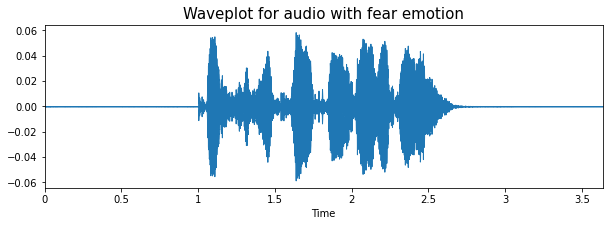

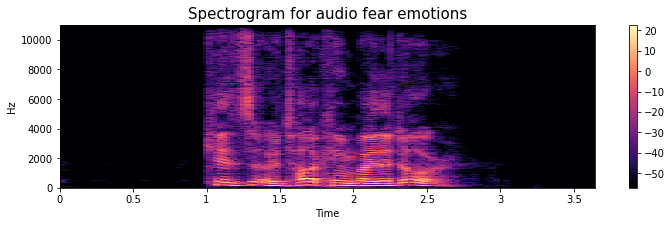

In [55]:
emotion="fear"
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, samplig_rate  = librosa.load(path)
create_waveplot(data,samplig_rate,emotion)
create_spectrogram(data,samplig_rate,emotion)
Audio(path)

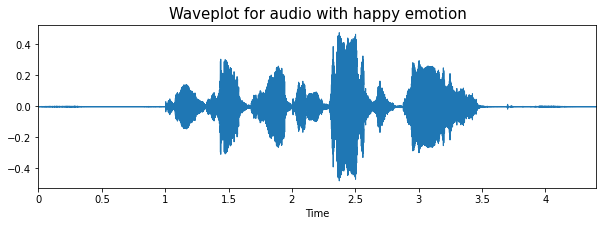

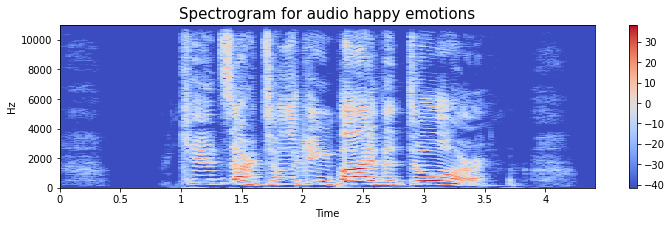

In [56]:
emotion="happy"
path = np.array(data_path.Path[data_path.Emotions == emotion])[np.random.randint(100)]
data, samplig_rate  = librosa.load(path)
create_waveplot(data,samplig_rate,emotion)
create_spectrogram(data,samplig_rate,emotion)
Audio(path)

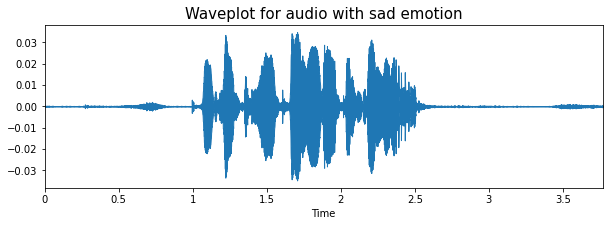

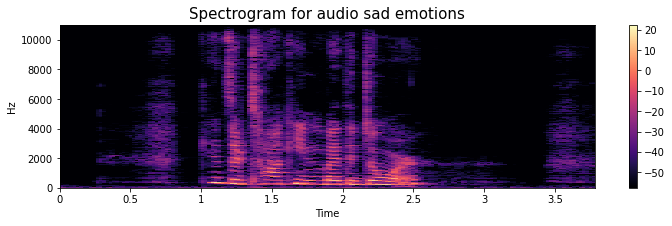

In [57]:
emotion="sad"
path = np.array(data_path.Path[data_path.Emotions == emotion])[np.random.randint(100)]
data, samplig_rate  = librosa.load(path)
create_waveplot(data,samplig_rate,emotion)
create_spectrogram(data,samplig_rate,emotion)
Audio(path)

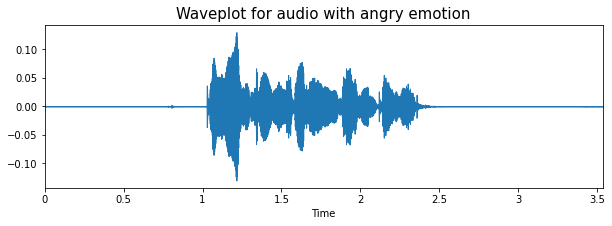

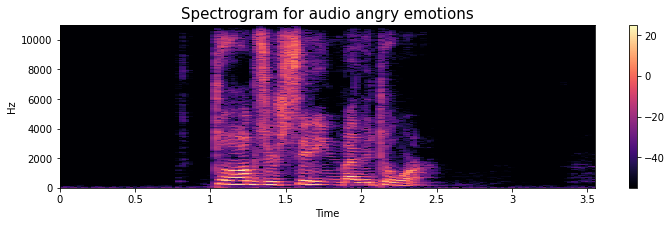

In [58]:
emotion="angry"
path = np.array(data_path.Path[data_path.Emotions == emotion])[np.random.randint(100)]
data, samplig_rate  = librosa.load(path)
create_waveplot(data,samplig_rate,emotion)
create_spectrogram(data,samplig_rate,emotion)
Audio(path)

## Veri Çeşitlendirme

In [59]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.max(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data,rate=0.8):
    return librosa.effects.time_stretch(data,rate)

def shift(data):
    shift_range = int(np.random.uniform(low = -5, high=5)*1000)

def pitch(data,sampling_rate,pitch_factor=0.7):
    return librosa.effects.pitch_shift(data,sampling_rate,pitch_factor)


In [60]:
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

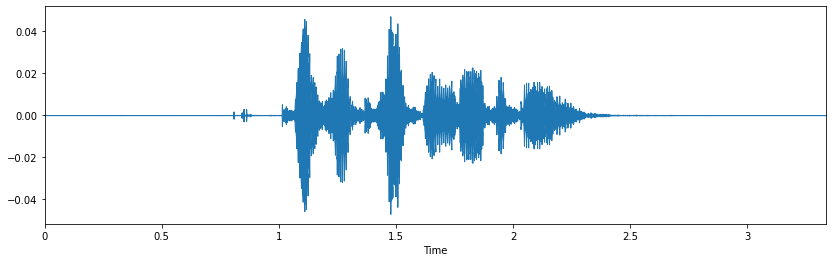

In [61]:
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

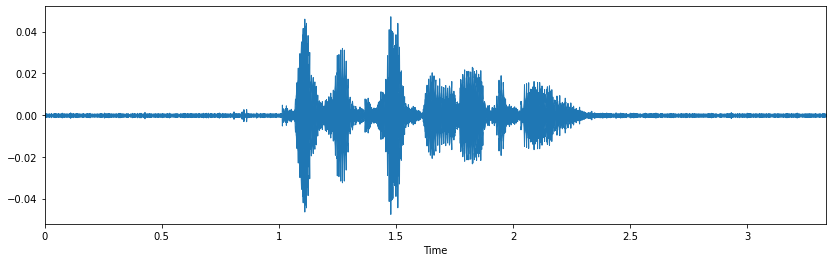

In [62]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

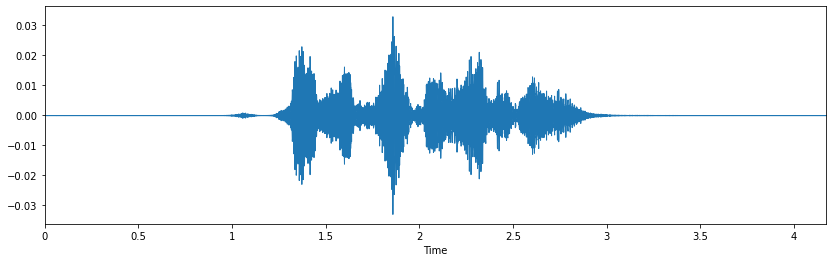

In [63]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x,sr=sample_rate)
Audio(x,rate=sample_rate)

# Özellik çıkarımı

In [76]:
def extract_features(data):
    # zero-crossing rate özelliği
    result = np.array([])
    zcr=np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0) # axis = 0 demek sütun bazlı ortalama
    result = np.hstack((result,zcr)) # yatay biçimde birleştirme işlemi yapıyoruz
    
    stft = np.abs(librosa.stft(data)) #mutlak değerini alıyoruz
    # 12 oktav özelliği veriyor
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))
    
    mfcc_1 = np.array(librosa.feature.mfcc(y=data, sr=sample_rate))
    mfcc_2 = np.array(librosa.feature.delta(mfcc_1))
    mfcc_3 = np.array(librosa.feature.delta(mfcc_1,order=2))
    
    mfcc_1 = np.mean(mfcc_1.T, axis=0)
    mfcc_2 = np.mean(mfcc_2.T, axis=0)
    mfcc_3 = np.mean(mfcc_3.T, axis=0)
    #mfcc matrix çıktısı verdiği için onu 1b vektöre dönüştürüyoruz. Ortalamasını alarak 
    result = np.hstack((result, mfcc_1))
    result = np.hstack((result, mfcc_2)) 
    result = np.hstack((result, mfcc_3)) 
    
    #rms değeri
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))
    
    rms_var = np.var(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms_var))
    
    # bant genişliği
    spec_bandwith = np.mean(librosa.feature.spectral_bandwidth(y=data).T,axis=0)
    result = np.hstack((result, spec_bandwith))
    
    spec_bandwith_var = np.var(librosa.feature.spectral_bandwidth(y=data).T,axis=0)
    result = np.hstack((result, spec_bandwith_var))
    
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))
    
    #spectrum ağırlık merkezinin değerini veren 
    spec_cent = np.mean(librosa.feature.spectral_centroid(y=data, sr=sample_rate).T,axis=0)
    result = np.hstack((result,spec_cent))
    
    
    return result

In [77]:
data, sample_rate = librosa.load(path, duration=2.5, offset=0.6) 
#offset değeri, sesin başlayacağı süreyi temsil ediyor. yani ilk 0.6 saniye çıkarılmış oluyor
#duration değeri, yüklenmek istenen ses miktarını belirliyor.

In [78]:
res1 = extract_features(data)

In [79]:
res1.shape

(206,)

In [80]:
def get_features(path):
    data,sample_rate= librosa.load(path,duration=2.5, offset = 0.6)
    
    #çeşitlendirme yapmadan önce 
    
    res1 = extract_features(data)
    result = np.array(res1)
    
    # gürülütülü data 
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))
    
    #stretching ve pitch data 
    
    data_strectch_pitch = pitch(data,sample_rate)
    res3 = extract_features(data_strectch_pitch)
    result = np.vstack((result, res3))
    
    return result

In [81]:
#new_data = stretch(data)
data_strectch_pitch = pitch(data,sample_rate)
res3 = extract_features(data_strectch_pitch)

In [82]:
res3.shape

(206,)

In [83]:
noise_data = noise(data)
res2 = extract_features(noise_data)
res2.shape

(206,)

In [84]:
X,Y = [], []

for path, emotion in zip(data_path.Path,data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [85]:
len(X), len(Y), data_path.Path.shape

(36486, 36486, (12162,))

In [86]:
Features = pd.DataFrame(X)
Features["labels"]=Y
Features.to_csv("features.csv",index=False)

In [2]:
Features = pd.read_csv("features.csv")

In [3]:
Features.head()

0         1         2         3         4         5         6  \
0  0.300781  0.706492  0.756853  0.735217  0.731014  0.715156  0.667529   
1  0.316085  0.797880  0.835315  0.804713  0.814377  0.820303  0.732443   
2  0.184796  0.650088  0.705284  0.766884  0.740786  0.715097  0.685506   
3  0.271272  0.674966  0.723259  0.724594  0.681301  0.670643  0.674574   
4  0.289216  0.733730  0.771479  0.781933  0.742403  0.746185  0.747216   

          7         8         9  ...       197       198       199  \
0  0.673754  0.722173  0.748969  ...  0.000003  0.000002  0.000002   
1  0.683688  0.714358  0.760965  ...  0.000051  0.000049  0.000050   
2  0.656952  0.712487  0.744546  ...  0.000002  0.000002  0.000001   
3  0.630036  0.680146  0.708276  ...  0.000007  0.000007  0.000007   
4  0.646985  0.668124  0.718284  ...  0.000019  0.000018  0.000018   

            200       201       202           203           204          205  \
0  5.131694e-06  0.000008  0.000005  2.270858e-06  1.642365e-07  2908.735496   
1  5.360502e-05  0.000053  0.000055  5.298120e-05  4.713542e-05  4262.043702   
2  8.168944e-07  0.000002  0.000002  8.497094e-07  4.750486e-08  2915.911801   
3  1.217880e-05  0.000009  0.000008  2.638513e-06  1.788902e-07  2763.646533   
4  2.237310e-05  0.000020  0.000018  1.342570e-05  1.120300e-05  3909.688354   

    labels  
0  neutral  
1  neutral  
2  neutral  
3  neutral  
4  neutral  

[5 rows x 207 columns]

In [4]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [5]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [6]:
Y[1]

array([0., 0., 0., 0., 0., 1., 0., 0.])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 206), (27364, 8), (9122, 206), (9122, 8))

In [8]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 206), (27364, 8), (9122, 206), (9122, 8))

In [9]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 206, 1), (27364, 8), (9122, 206, 1), (9122, 8))

In [10]:
model = Sequential()
model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding="same", activation="relu"))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding="same"))

model.add(Conv1D(256,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding="same"))
model.add(Dropout(0.2))
          
model.add(Conv1D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding="same"))
        
model.add(Flatten())
model.add(Dense(units=64,activation="relu"))
model.add(Dropout(0.3))
    
model.add(Dense(units=8,activation="softmax"))
        
          
model.compile(optimizer = 'RMSprop' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 206, 512)          3072      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 103, 512)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 103, 256)          655616    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 52, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 52, 256)           327936    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 26, 256)           0         
_________________________________________________________________
dropout (Dropout)            (None, 26, 256)           0

In [11]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.3, verbose=0, patience=2, min_lr=0.001)
history=model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
856/856 [==============================] - 44s 30ms/step - loss: 1.7493 - accuracy: 0.3011 - val_loss: 1.3203 - val_accuracy: 0.4756
Epoch 2/50
856/856 [==============================] - 25s 29ms/step - loss: 1.3211 - accuracy: 0.4797 - val_loss: 1.2187 - val_accuracy: 0.5146
Epoch 3/50
856/856 [==============================] - 25s 29ms/step - loss: 1.2134 - accuracy: 0.5211 - val_loss: 1.2192 - val_accuracy: 0.5166
Epoch 4/50
856/856 [==============================] - 25s 29ms/step - loss: 1.1902 - accuracy: 0.5321 - val_loss: 1.1359 - val_accuracy: 0.5481
Epoch 5/50
856/856 [==============================] - 25s 29ms/step - loss: 1.1632 - accuracy: 0.5583 - val_loss: 1.1879 - val_accuracy: 0.5210
Epoch 6/50
856/856 [==============================] - 25s 29ms/step - loss: 1.1369 - accuracy: 0.5565 - val_loss: 1.1616 - val_accuracy: 0.5454
Epoch 7/50
856/856 [==============================] - 25s 29ms/step - loss: 1.1534 - accuracy: 0.5593 - val_loss: 1.1593 - val_accuracy:

KeyboardInterrupt: 

In [12]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

286/286 [==============================] - 3s 10ms/step - loss: 1.1574 - accuracy: 0.6422
Accuracy of our model on test data :  64.21837210655212 %


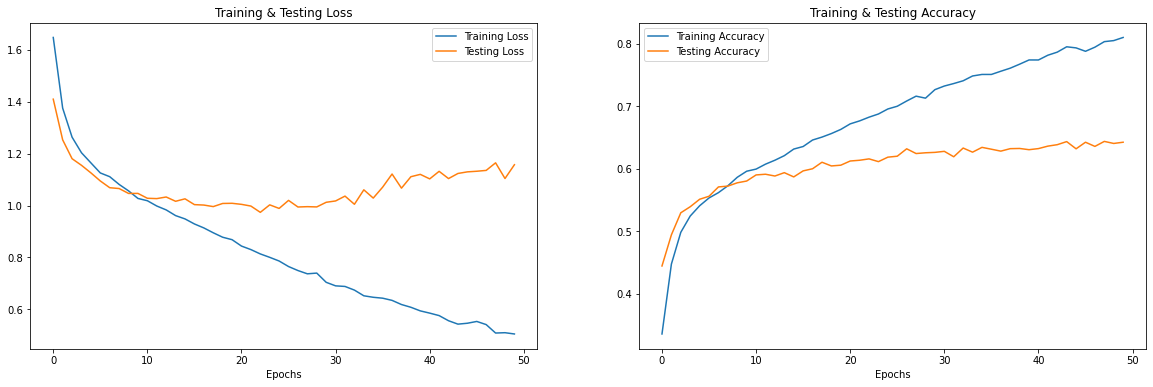

In [13]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [14]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [15]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0              sad       disgust
1          disgust       disgust
2            angry         angry
3          disgust       disgust
4          disgust          fear
5          disgust          fear
6             fear         happy
7            happy         happy
8          disgust           sad
9          neutral           sad

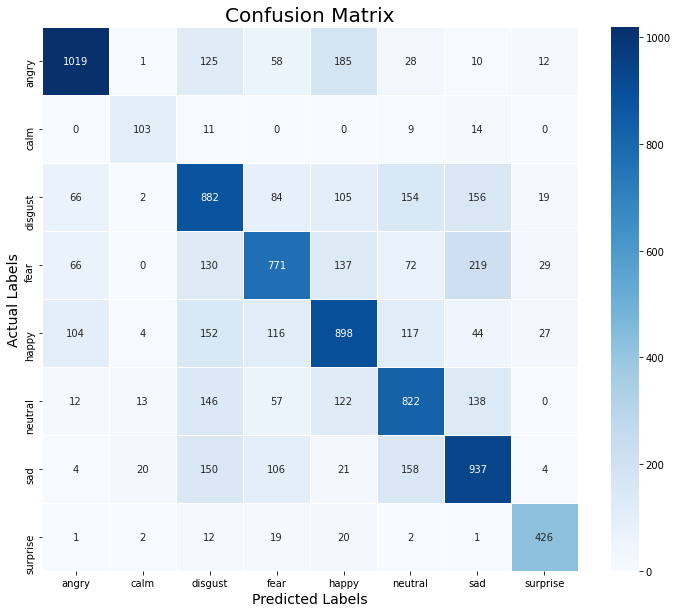

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.80      0.71      0.75      1438
        calm       0.71      0.75      0.73       137
     disgust       0.55      0.60      0.57      1468
        fear       0.64      0.54      0.59      1424
       happy       0.60      0.61      0.61      1462
     neutral       0.60      0.63      0.62      1310
         sad       0.62      0.67      0.64      1400
    surprise       0.82      0.88      0.85       483

    accuracy                           0.64      9122
   macro avg       0.67      0.67      0.67      9122
weighted avg       0.65      0.64      0.64      9122

